<a href="https://colab.research.google.com/github/st-le/pytorch_deep_learning/blob/master/hello_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TODO**: document the vanishing gradient and the fix. Hint: revert this

some imports


In [0]:
import torch.optim as optim 
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import cv2

someone mnist model

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

class dumbNet(nn.Module):
  def __init__(self):
    super(dumbNet, self).__init__()
    # self.ln1 = nn.Linear(784,128)
    # self.ln2 = nn.Linear(128,10)
    self.ln1 = nn.Linear(2352, 784)
    self.ln2 = nn.Linear(784,10)

  def forward(self,x):
    x = self.ln1(x)
    
    x = F.relu(x)    
    
    x = self.ln2(x)
    
    x = F.relu(x)
    x = F.softmax(x)
    return x

  def relu2_out(self, x):
    x = self.ln1(x)
    x = F.relu(x)
    x = self.ln2(x)
    x = F.relu(x)
    return x

get some data

(28, 28)
(784,)
<class 'numpy.ndarray'>
gt is:  5
gt type is:  <class 'int'>


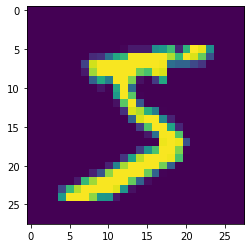

(28, 28)
uint8


In [0]:
from __future__ import print_function
import torch
import torch.nn as nn

from torchvision import datasets
# import datasets.MNIST as MNIST


from PIL import Image

# x = torch.rand(10)
# print(x)
mnist = datasets.MNIST('../sdata', download=True)
# mnist = datasets.MNIST('../sdata')
item = mnist.__getitem__(0) 
img = np.array(item[0])
y = item[1]
print(img.shape)
print(img.flatten().squeeze().shape)
print(type(img))
print('gt is: ', y)
print('gt type is: ', type(y))

inp = img.flatten().squeeze()
plt.imshow(img)
plt.show()

print(img.shape)
print(img.dtype)

create the data processing

In [0]:
# print(item[0].size)
# rgbimg = Image.new("RGBA", item[0].size)
# print(rgbimg.size)
# rgbimg.paste(img)


In [0]:
# rgbimg = Image.new("RGB", item[0].size)
# rgbimg.paste(img)
rgbimg = item[0]
rgbimg = np.array(rgbimg)
print(rgbimg.shape)
rgbimg = cv2.cvtColor(rgbimg, cv2.COLOR_GRAY2RGB)
rgbimg = Image.fromarray(np.uint8(rgbimg))

img_proc = transforms.Compose([
                                #  transforms.Resize(64),
                                 transforms.ToTensor(),
                                # transforms.Normalize(mean=[0.485,0.456], 
                                #                     std=[0.229,0.224])
                                 transforms.Normalize(mean=[0.485,0.456,0.406], 
                                                      std=[0.229,0.224,0.225])
])

print(item[0].size)
# im = img_proc(item[0])
im = img_proc(rgbimg)
print(np.array(im).shape)
print(np.array(rgbimg).shape)


(28, 28)
(28, 28)
(3, 28, 28)
(28, 28, 3)


create the model


In [0]:

# use a dumb net
# model = nn.Sequential(
#           nn.Linear(784,128),
#           nn.ReLU(),
#           nn.Linear(128,10),
#           nn.ReLU(),
#           nn.Softmax()
#         )
model = dumbNet()


# use someone mnist net 
# model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_fun = nn.CrossEntropyLoss()


inspect the model i.e. the init weights by histograms

Parameter containing:
tensor([[-0.0180, -0.0136, -0.0082,  ..., -0.0118, -0.0044, -0.0201],
        [-0.0099,  0.0135, -0.0060,  ...,  0.0019, -0.0119, -0.0031],
        [ 0.0064, -0.0028, -0.0023,  ...,  0.0205,  0.0153, -0.0069],
        ...,
        [-0.0003,  0.0114,  0.0184,  ...,  0.0051, -0.0080,  0.0008],
        [ 0.0129,  0.0145,  0.0069,  ..., -0.0106,  0.0107, -0.0170],
        [ 0.0183, -0.0048,  0.0107,  ...,  0.0146, -0.0130,  0.0128]],
       requires_grad=True)


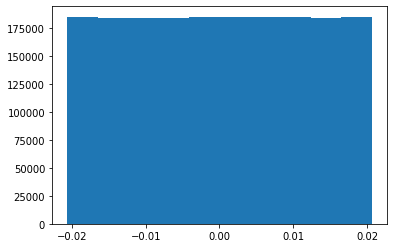

Parameter containing:
tensor([ 2.0751e-03, -1.0260e-02, -2.4462e-03,  1.4897e-02,  1.1610e-03,
        -1.9877e-02, -2.4024e-03,  1.3850e-02, -8.1426e-03, -1.7162e-02,
         5.0592e-03, -2.7900e-03,  2.0046e-02, -5.2495e-03,  1.4343e-02,
        -3.4288e-03, -5.9601e-03, -1.4369e-02,  6.1180e-03, -3.3500e-03,
         3.2864e-03, -6.9102e-03,  1.6094e-02,  1.5796e-02,  1.0258e-02,
         1.0017e-02,  1.9645e-02,  1.1464e-02,  1.2657e-02,  2.9976e-03,
         8.1695e-03, -9.3310e-03, -2.0783e-03,  1.7907e-02, -7.3194e-03,
         9.9859e-03,  3.5920e-03,  6.8183e-03, -8.8253e-04, -1.1219e-02,
        -6.2019e-03,  5.3503e-05,  2.9512e-03, -1.1561e-02,  3.0256e-03,
        -1.4690e-03,  1.1038e-02, -3.8980e-03,  1.5915e-02,  7.5588e-03,
         3.3270e-03,  1.1530e-02, -1.3782e-03, -1.3245e-02,  3.6009e-03,
         7.4783e-03, -1.1221e-02,  1.6309e-02, -8.5181e-03, -3.4075e-03,
         1.1418e-02,  2.9318e-03, -7.9587e-03,  2.6657e-03,  1.2405e-02,
         1.5460e-03, -4.8088e

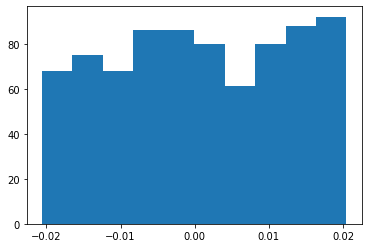

Parameter containing:
tensor([[ 0.0270,  0.0160, -0.0305,  ...,  0.0336, -0.0325,  0.0175],
        [ 0.0174,  0.0022, -0.0239,  ...,  0.0170, -0.0233,  0.0146],
        [-0.0200,  0.0256,  0.0230,  ..., -0.0259,  0.0145, -0.0006],
        ...,
        [-0.0102, -0.0328,  0.0008,  ...,  0.0125,  0.0345, -0.0134],
        [ 0.0188,  0.0106,  0.0338,  ..., -0.0261,  0.0223,  0.0244],
        [-0.0149, -0.0088,  0.0335,  ...,  0.0079, -0.0005, -0.0236]],
       requires_grad=True)


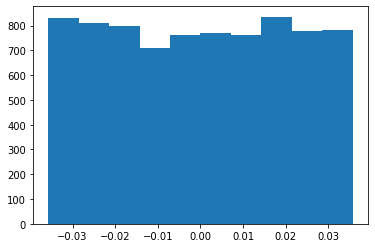

Parameter containing:
tensor([ 0.0147,  0.0077, -0.0128, -0.0279,  0.0123,  0.0173,  0.0075, -0.0052,
         0.0171, -0.0058], requires_grad=True)


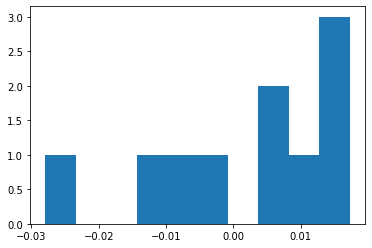

In [0]:
# for name, param in model.named_parameters():
#   print(name, ' --> ', param) 
for param in model.parameters():
  print(param)
  w = param.cpu().detach().numpy()
  counts, bins = np.histogram(w)
  _ = plt.hist(bins[:-1], bins, weights=counts)
  plt.show()

run one forward pass

**BUG**

the bug can be **FOUND** here. High chance it requires normalization of input **values**

In [0]:
if torch.cuda.is_available():
  print("cuda is available")
  device = torch.device("cuda")
else:
  print("cuda is NOT available")
  device = torch.device("cpu")

# device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model.to(device)

for i, batch in enumerate(mnist): 
  pimg, target = batch
  # print(target)
  # plt.imshow(img)
  # plt.show()
  # img = np.array(pimg)
  pimg = np.array(pimg)
  rgbimg = cv2.cvtColor(pimg, cv2.COLOR_GRAY2RGB)
  rgbimg = Image.fromarray(np.uint8(rgbimg))

  # gpu_img = torch.tensor(img.flatten().astype('float32'))
  # gpu_img = gpu_img.to(device)
  # gpu_img = transforms(rgbimg)
  gpu_img = img_proc(rgbimg)
  gpu_img = gpu_img.to(device)
  gpu_img = torch.reshape(gpu_img, (1,2352))
  target = torch.tensor(np.array([target]).astype('int64'))
  target = target.to(device) 

  output = model(gpu_img)
  output = output.view(1, 10)
  rl2_o = model.relu2_out(gpu_img)
  
  loss = loss_fun(output, target)
  print('target = ', target)
  # print('rl2 out = ', rl2_o)
  # print('out=',output)
  print('loss=', loss)
  print()
  if i == 20 : break

# data = torch.tensor(img.flatten().astype('float32'))
# output = model(data)
# output = output.view(1, 10)

# print(output)
# print(output.shape)
# # print(target)

# celoss = nn.CrossEntropyLoss()
# target = torch.tensor(np.array([y]).astype('int64'))

# loss = celoss(output, target)
# print(loss)
# print(loss.detach().numpy())

cuda is available
cuda
target =  tensor([5], device='cuda:0')
loss= tensor(2.3190, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([0], device='cuda:0')
loss= tensor(2.2930, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([4], device='cuda:0')
loss= tensor(2.3126, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([1], device='cuda:0')
loss= tensor(2.2590, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([9], device='cuda:0')
loss= tensor(2.3174, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([2], device='cuda:0')
loss= tensor(2.2831, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([1], device='cuda:0')
loss= tensor(2.2765, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([3], device='cuda:0')
loss= tensor(2.3197, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([1], device='cuda:0')
loss= tensor(2.2697, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([4], device='cu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


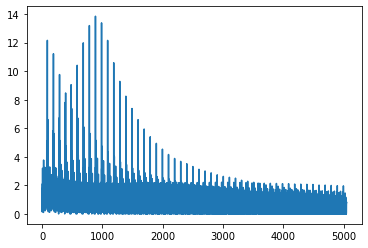

In [0]:

n_epoch = 50
n_step = 100
loss_arr = []
grad_arr = []
model.train()
for epoch in range(n_epoch) :
  for i, batch in enumerate(mnist): 
    optimizer.zero_grad()

    pimg, target = batch
    # print(target)
    # plt.imshow(img)
    # plt.show()
    # img = np.array(pimg)
    pimg = np.array(pimg)
    rgbimg = cv2.cvtColor(pimg, cv2.COLOR_GRAY2RGB)
    rgbimg = Image.fromarray(np.uint8(rgbimg))

    # gpu_img = torch.tensor(img.flatten().astype('float32'))
    # gpu_img = gpu_img.to(device)
    # gpu_img = transforms(rgbimg)
    gpu_img = img_proc(rgbimg)
    gpu_img = gpu_img.to(device)
    gpu_img = torch.reshape(gpu_img, (1,2352))
    target = torch.tensor(np.array([target]).astype('int64'))
    target = target.to(device) 

    output = model(gpu_img)
    output = output.view(1, 10)
    rl2_o = model.relu2_out(gpu_img)
    
    loss = loss_fun(output, target)

    # img, target = batch
    # # print(target)
    # # plt.imshow(img)
    # # plt.show()
    # img = np.array(img)
    # gpu_img = torch.tensor(img.flatten().astype('float32'))
    # gpu_img = gpu_img.to(device)
    # target = torch.tensor(np.array([target]).astype('int64'))
    # target = target.to(device)

    # output = model(gpu_img)
    # output = output.view(1, 10)
    # # print(output)
   
    # loss = loss_fun(output, target)

    # loss_arr.append(loss.detach().numpy()) # 1.
    loss_arr.append(loss.data.item()) # 2.

    loss.backward()
    optimizer.step()

    # check grad
    for param in model.parameters():
      g = param.grad.cpu().detach().numpy()
      grad_arr.append(np.linalg.norm(g))
      break

    #  check weights
    # for param in model.parameters():
    #   w = param.cpu().detach().numpy()
    #   counts, bins = np.histogram(w)
    #   plt.hist(bins[:-1], bins, weights=counts)
    #   plt.show()
    #   break

    #   print(param.requires_grad)
    if i == n_step: break
plt.plot(grad_arr)
plt.show()

draw graphs

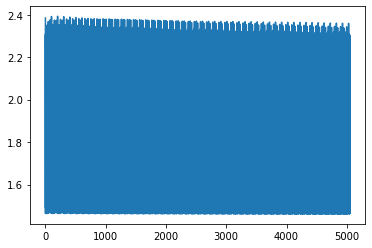

In [0]:
plt.plot(loss_arr)

inspect backward 

In [0]:
loss.backward()

for name, param in model.named_parameters():
  print(name, ' --> ', param) 
  print(param.grad)

one update step


In [0]:
# 
input = torch.randn(3, 5, requires_grad=True)
print(input)
print(input.shape)
target = torch.randint(5, (3,), dtype=torch.int64)
print(target)
loss = nn.functional.cross_entropy(input, target)
print(loss)